In [4]:
import pandas as pd
import numpy as np
import re
import warnings
# Sample string
warnings.filterwarnings("ignore")

In [2]:
del df
del df2

NameError: name 'df' is not defined

In [83]:
df = pd.read_csv("C:/Users/Aaditya Gupta/Downloads/HPC_BOOST-main/HPC_BOOST-1/convert/merge_benign.csv")
df2 = pd.read_csv("C:/Users/Aaditya Gupta/Downloads/HPC_BOOST-main/HPC_BOOST-1/convert/merge_malicious.csv")



In [81]:
def make_df_core(temp):
    l=list(temp.columns)
    for i in range(4,len(list(temp.columns))):
        var1=l[i]+"_1"
        var2=l[i]+"_2"
        var3=l[i]+"_3"
        var4=l[i]+"_4"
        temp1 = temp[l[i]].str.split("'",expand=True)[1]
        temp2 = temp[l[i]].str.split("'",expand=True)[3]
        temp3 = temp[l[i]].str.split("'",expand=True)[5]
        temp4 = temp[l[i]].str.split("'",expand=True)[7]
        temp_ = pd.concat([temp1, temp2,temp3,temp4], axis=1)
        temp[[var1,var2,var3,var4]] = temp_
        temp.drop(columns=[l[i]], inplace=True)
    
    l=list(temp.columns)
    for i in range(len(l)):
        temp[l[i]] = temp[l[i]].astype(float)
    print(temp.dtypes)
    return temp
# l2=list(temp2.columns)
# for i in range(4,len(list(temp2.columns))):
#     var1=l2[i]+"_1"
#     var2=l2[i]+"_2"
#     var3=l2[i]+"_3"
#     var4=l2[i]+"_4"
#     temp2[[var1,var2,var3,var4]] = temp2[l2[i]].str.split(",",expand=True)
#     temp2.drop(columns=[l2[i]], inplace=True)

In [84]:
df = make_df_core(df)
df2 = make_df_core(df2)

Unnamed: 0                          float64
EventCount                          float64
CpuCount                            float64
Total runtime [s]                   float64
TEMP_CORE_1                         float64
                                     ...   
FRONTEND_RETIRED_LATENCY_GE_32_4    float64
FRONTEND_RETIRED_LATENCY_GE_64_1    float64
FRONTEND_RETIRED_LATENCY_GE_64_2    float64
FRONTEND_RETIRED_LATENCY_GE_64_3    float64
FRONTEND_RETIRED_LATENCY_GE_64_4    float64
Length: 1632, dtype: object
Unnamed: 0                          float64
EventCount                          float64
CpuCount                            float64
Total runtime [s]                   float64
TEMP_CORE_1                         float64
                                     ...   
FRONTEND_RETIRED_LATENCY_GE_32_4    float64
FRONTEND_RETIRED_LATENCY_GE_64_1    float64
FRONTEND_RETIRED_LATENCY_GE_64_2    float64
FRONTEND_RETIRED_LATENCY_GE_64_3    float64
FRONTEND_RETIRED_LATENCY_GE_64_4    float64
Leng

In [85]:
index_col = df['Total runtime [s]']

In [97]:
df.set_index("Total runtime [s]",inplace=True )
df2.set_index("Total runtime [s]",inplace=True )

In [87]:
df.head()

,Unnamed: 0,EventCount,CpuCount,TEMP_CORE_1,TEMP_CORE_2,TEMP_CORE_3,TEMP_CORE_4,PWR_PKG_ENERGY_1,PWR_PKG_ENERGY_2,PWR_PKG_ENERGY_3,...,FRONTEND_RETIRED_LATENCY_GE_16_3,FRONTEND_RETIRED_LATENCY_GE_16_4,FRONTEND_RETIRED_LATENCY_GE_32_1,FRONTEND_RETIRED_LATENCY_GE_32_2,FRONTEND_RETIRED_LATENCY_GE_32_3,FRONTEND_RETIRED_LATENCY_GE_32_4,FRONTEND_RETIRED_LATENCY_GE_64_1,FRONTEND_RETIRED_LATENCY_GE_64_2,FRONTEND_RETIRED_LATENCY_GE_64_3,FRONTEND_RETIRED_LATENCY_GE_64_4
Total runtime [s],,,,,,,,,,,,,,,,,,,,,
0.000025,0.0,31.0,4.0,41.0,39.0,41.0,41.0,0.056030,0.0,0.0,...,283.0,67.0,367.0,790.0,283.0,67.0,367.0,790.0,283.0,67.0
0.009996,1.0,31.0,4.0,40.0,38.0,41.0,39.0,0.072388,0.0,0.0,...,423.0,342.0,327.0,1273.0,423.0,342.0,327.0,1273.0,423.0,342.0
0.020073,2.0,31.0,4.0,40.0,38.0,39.0,38.0,0.065491,0.0,0.0,...,810.0,255.0,89.0,947.0,810.0,255.0,89.0,947.0,810.0,255.0
0.030574,3.0,31.0,4.0,39.0,37.0,38.0,37.0,0.025330,0.0,0.0,...,372.0,146.0,310.0,258.0,372.0,146.0,310.0,258.0,372.0,146.0
0.050468,4.0,31.0,4.0,38.0,37.0,38.0,37.0,0.054382,0.0,0.0,...,1237.0,240.0,375.0,41.0,1237.0,240.0,375.0,41.0,1237.0,240.0


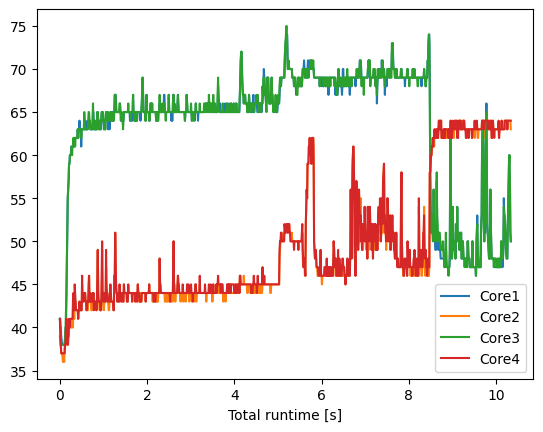

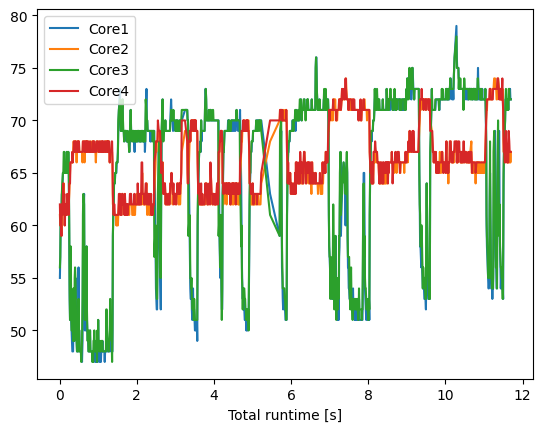

In [98]:
import matplotlib.pyplot as plt

# y=df['TEMP_CORE_1']
# x=df['Total runtime [s]']
df.TEMP_CORE_1.plot(label="Core1")
df.TEMP_CORE_2.plot(label="Core2")
df.TEMP_CORE_3.plot(label="Core3")
df.TEMP_CORE_4.plot(label="Core4")
# plt.plot(x,y)
plt.legend()
plt.show()

df2.TEMP_CORE_1.plot(label="Core1")
df2.TEMP_CORE_2.plot(label="Core2")
df2.TEMP_CORE_3.plot(label="Core3")
df2.TEMP_CORE_4.plot(label="Core4")
# plt.plot(x,y)
plt.legend()
plt.show()

<AxesSubplot:xlabel='Total runtime [s]'>

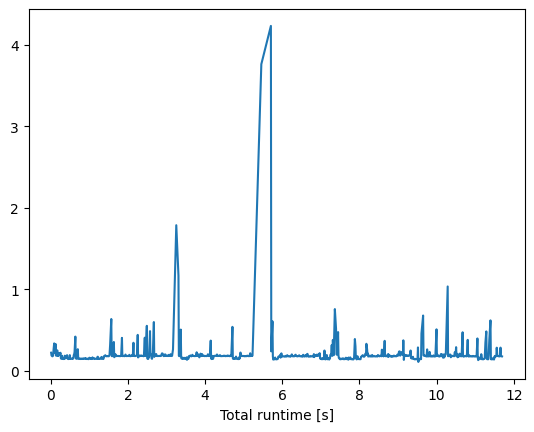

In [99]:
df2.PWR_PKG_ENERGY_1.plot()

In [100]:
vector = df.values.flatten()
vector2 = df2.values.flatten()

In [101]:
len(vector),len(vector2),len(df.columns),len(df2.columns)

(1676668, 1712550, 1631, 1631)

In [106]:
len(vector2)/(1631*5)

210.0

In [103]:
len(vector)/205

8178.868292682927

In [107]:
x_data=[]
y_data=[]
for i in range(0,204):
    # print(i*5*108 , (i+1)*108*5)
    x_data.append(vector[i*5*1631:(i+1)*1631*5])
    y_data.append(0)

In [109]:
for i in range(0,209):
    # print(i*5*108 , (i+1)*108*5)
    x_data.append(vector2[i*5*1631:(i+1)*1631*5])
    y_data.append(1)

In [ ]:
for i in range(len(x_data)):
     print(len(x_data[i]),i)

In [144]:
x_data.shape

(413, 8155)

In [348]:
108*5

540

In [349]:
for i in range(1000):
    noise = 0.1 * np.random.randn(8155)
    # print(x_data[i].shape,noise.shape,x_data[i],i)
    lambda_val = 28  # Adjust this parameter based on your data
    noise2 = np.random.poisson(lambda_val, size=x_data[i].shape)
    scale = 8000 # Adjust this parameter based on your data
    noise3 = np.random.laplace(0, scale, size=x_data[i].shape)

    noise_uniform = np.random.uniform(-50, 50, size=x_data[i].shape)

    noisy_arr = x_data[i] + noise + noise2 + noise3+noise_uniform
    x_data.append(noisy_arr)
    y_data.append(1)

In [116]:
two_d_array = np.vstack(x_data)
print(two_d_array)


[[0.0000e+00 3.1000e+01 4.0000e+00 ... 4.1000e+01 1.2370e+03 2.4000e+02]
 [5.0000e+00 3.1000e+01 4.0000e+00 ... 4.9300e+02 7.9900e+02 1.4500e+02]
 [1.0000e+01 3.1000e+01 4.0000e+00 ... 1.2270e+03 1.1146e+04 8.6200e+02]
 ...
 [1.0300e+03 3.1000e+01 4.0000e+00 ... 1.3300e+02 1.1500e+02 4.6700e+02]
 [1.0350e+03 3.1000e+01 4.0000e+00 ... 1.5700e+02 2.4900e+02 1.1900e+02]
 [1.0400e+03 3.1000e+01 4.0000e+00 ... 6.1800e+02 7.9100e+02 7.1900e+02]]


In [117]:
x_data=np.array(two_d_array)

In [119]:
y_data = np.array(y_data)

In [118]:
x_data.shape

(413, 8155)

In [120]:
x_data[100]

array([500.,  31.,   4., ...,  87.,  35., 197.])

In [ ]:
arr = np.random.rand(5, 5)
# Add Gaussian (normal) noise with mean 0 and standard deviation 0.1
noise = 0.1 * np.random.randn(5, 5)
noisy_arr = arr + noise

In [125]:
len(x_data[0])

8155

In [126]:
from sklearn.model_selection import train_test_split

x_data = np.asarray(x_data).astype('float32')
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=2)


In [141]:
X_test[10]

array([1035.,   31.,    4., ...,  157.,  249.,  119.], dtype=float32)

In [205]:
!pip install sentence_transformers


  Using cached simpletransformers-0.64.3-py3-none-any.whl (250 kB)
  Using cached wandb-0.16.0-py3-none-any.whl (2.1 MB)
  Using cached streamlit-1.28.2-py2.py3-none-any.whl (8.4 MB)
  Using cached transformers-4.35.2-py3-none-any.whl (7.9 MB)
  Using cached seqeval-1.2.2-py3-none-any.whl
  Using cached tokenizers-0.15.0-cp39-none-win_amd64.whl (2.2 MB)
  Using cached huggingface_hub-0.19.4-py3-none-any.whl (311 kB)
  Using cached GitPython-3.1.40-py3-none-any.whl (190 kB)
  Using cached docker_pycreds-0.4.0-py2.py3-none-any.whl (9.0 kB)
  Using cached rich-13.7.0-py3-none-any.whl (240 kB)
  Using cached tzlocal-5.2-py3-none-any.whl (17 kB)
  Using cached blinker-1.7.0-py3-none-any.whl (13 kB)
  Using cached pydeck-0.8.1b0-py2.py3-none-any.whl (4.8 MB)
  Using cached altair-5.1.2-py3-none-any.whl (516 kB)
  Using cached tensorboard-2.15.1-py3-none-any.whl (5.5 MB)
  Using cached grpcio-1.59.3-cp39-cp39-win_amd64.whl (3.7 MB)
  Using cached google_auth_oauthlib-1.1.0-py2.py3-none-any.wh

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.23.4 which is incompatible.
tensorflow 2.9.1 requires tensorboard<2.10,>=2.9, but you have tensorboard 2.15.1 which is incompatible.


     ---------------------------------------- 86.0/86.0 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 192.2/192.2 MB 4.8 MB/s eta 0:00:00
     ---------------------------------------- 1.1/1.1 MB 9.0 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 13.8 MB/s eta 0:00:00
     ---------------------------------------- 1.6/1.6 MB 13.1 MB/s eta 0:00:00
     ---------------------------------------- 5.7/5.7 MB 7.5 MB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 11.1 MB/s eta 0:00:00
     ------------------------------------- 536.2/536.2 kB 17.0 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=7bbd24a07ca0f277235928b004a3411677604df4f857e13e27ee0ba5444767dc
  Stored in directory: c:\users\aaditya gupta\appdata\local\pip\cache\wheels\71\67\0

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Aaditya Gupta\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python39\\site-packages\\~il\\_imaging.cp39-win_amd64.pyd'
Check the permissions.



In [207]:
!pip install torchvision 



  Using cached torchvision-0.16.1-cp39-cp39-win_amd64.whl (1.1 MB)
  Using cached torch-2.1.1-cp39-cp39-win_amd64.whl (192.2 MB)
  Using cached networkx-3.2.1-py3-none-any.whl (1.6 MB)

[notice] A new release of pip available: 22.2 -> 23.3.1
[notice] To update, run: C:\Users\Aaditya Gupta\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [212]:
X_train.shape

(3611, 108)

In [129]:
c=0
d=0
for i in y_test:
    if i==1:
        c+=1
    else:
        d+=1
print(c,d)

68 56


In [359]:
X_train[0]

array([-5.86930115e+02,  4.21000440e+07,  9.78910400e+06,  8.89878000e+06,
        9.95663500e+06,  3.30108100e+07,  8.02170500e+06,  7.32055600e+06,
        8.22958450e+06,  3.39589680e+07,  6.60212250e+06,  8.11643550e+06,
        8.32169000e+06,  4.19828281e+04,  2.95112844e+05,  1.08890922e+05,
        2.82651312e+05,  2.42626900e+06,  3.11135625e+05,  3.41369492e+04,
        3.78789600e+06,  8.83303027e+03, -1.81797031e+04,  2.44776543e+04,
        3.47740938e+04,  2.43169900e+06,  2.98910219e+05,  3.77516055e+04,
        3.82372900e+06,  1.32516394e+03,  1.31145889e+04,  4.39487451e+03,
       -9.93669617e+02,  3.79978976e+08,  1.05588440e+03,  5.67142383e+03,
       -5.44002563e+02,  7.76125562e+05, -1.61009583e+03,  7.27083252e+03,
       -7.29393945e+03,  1.01349050e+07,  1.44082050e+06,  5.34618203e+04,
        1.67603510e+07,  7.10491500e+06,  2.04726350e+06,  3.72553531e+05,
        7.65384700e+06,  5.91205750e+06,  1.70220350e+06,  3.25686312e+05,
        6.39592850e+06,  

In [134]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((289, 8155), (289,), (124, 8155), (124,))

In [142]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

rf_classifier = DecisionTreeClassifier()

# Fit the model
rf_classifier.fit(X_train, y_train)

# Predict on the test set
predictions = rf_classifier.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test,predictions)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9919354838709677


In [140]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=151)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
predictions = clf.predict(X_test)

# Generate a classification report
report = classification_report(y_test, predictions)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        56
           1       1.00      0.97      0.99        68

    accuracy                           0.98       124
   macro avg       0.98      0.99      0.98       124
weighted avg       0.98      0.98      0.98       124



In [138]:
clf = LogisticRegression(random_state=42)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
predictions = clf.predict(X_test)

# Generate a classification report
report = classification_report(y_test, predictions)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00        68

    accuracy                           1.00       124
   macro avg       1.00      1.00      1.00       124
weighted avg       1.00      1.00      1.00       124



In [145]:
from sklearn.ensemble import RandomForestClassifier

feature_names = [f"feature {i}" for i in range(X_train.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [146]:
import time

import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.030 seconds


In [149]:
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier instance
clf = RandomForestClassifier()

# Fit the model
clf.fit(X_train, y_train)

# Get feature importances
feature_importances = clf.feature_importances_


In [151]:
feature_importances

array([0., 0., 0., ..., 0., 0., 0.])

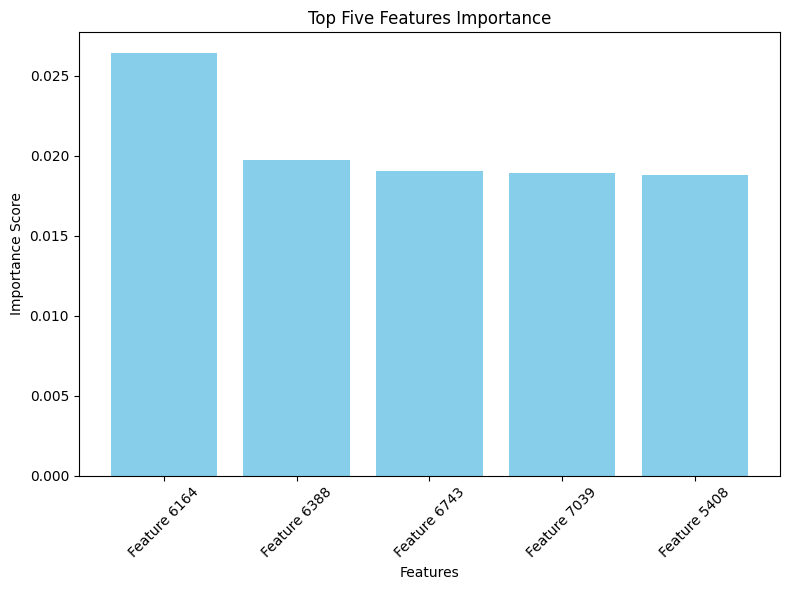

In [150]:
sorted_indices = np.argsort(feature_importances)[::-1]

# Select the top five features and their scores
top_five_indices = sorted_indices[:5]
top_five_features = [f"Feature {i+1}" for i in top_five_indices]
top_five_scores = feature_importances[top_five_indices]

# Plotting the top five features
plt.figure(figsize=(8, 6))
plt.bar(top_five_features, top_five_scores, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Top Five Features Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [152]:
df.columns

Index(['Unnamed: 0', 'EventCount', 'CpuCount', 'TEMP_CORE_1', 'TEMP_CORE_2',
       'TEMP_CORE_3', 'TEMP_CORE_4', 'PWR_PKG_ENERGY_1', 'PWR_PKG_ENERGY_2',
       'PWR_PKG_ENERGY_3',
       ...
       'FRONTEND_RETIRED_LATENCY_GE_16_3', 'FRONTEND_RETIRED_LATENCY_GE_16_4',
       'FRONTEND_RETIRED_LATENCY_GE_32_1', 'FRONTEND_RETIRED_LATENCY_GE_32_2',
       'FRONTEND_RETIRED_LATENCY_GE_32_3', 'FRONTEND_RETIRED_LATENCY_GE_32_4',
       'FRONTEND_RETIRED_LATENCY_GE_64_1', 'FRONTEND_RETIRED_LATENCY_GE_64_2',
       'FRONTEND_RETIRED_LATENCY_GE_64_3', 'FRONTEND_RETIRED_LATENCY_GE_64_4'],
      dtype='object', length=1631)

In [154]:
label = np.zeros(len(df))

In [157]:
label1 = np.ones(len(df2))

In [155]:
df['label'] = label

In [158]:
df2['label'] = label1

In [164]:
df_all = pd.concat([df,df2],axis=0)

In [162]:
df2.columns,df.columns

(Index(['Unnamed: 0', 'EventCount', 'CpuCount', 'TEMP_CORE_1', 'TEMP_CORE_2',
        'TEMP_CORE_3', 'TEMP_CORE_4', 'PWR_PKG_ENERGY_1', 'PWR_PKG_ENERGY_2',
        'PWR_PKG_ENERGY_3',
        ...
        'FRONTEND_RETIRED_LATENCY_GE_16_4', 'FRONTEND_RETIRED_LATENCY_GE_32_1',
        'FRONTEND_RETIRED_LATENCY_GE_32_2', 'FRONTEND_RETIRED_LATENCY_GE_32_3',
        'FRONTEND_RETIRED_LATENCY_GE_32_4', 'FRONTEND_RETIRED_LATENCY_GE_64_1',
        'FRONTEND_RETIRED_LATENCY_GE_64_2', 'FRONTEND_RETIRED_LATENCY_GE_64_3',
        'FRONTEND_RETIRED_LATENCY_GE_64_4', 'label'],
       dtype='object', length=1632),
 Index(['Unnamed: 0', 'EventCount', 'CpuCount', 'TEMP_CORE_1', 'TEMP_CORE_2',
        'TEMP_CORE_3', 'TEMP_CORE_4', 'PWR_PKG_ENERGY_1', 'PWR_PKG_ENERGY_2',
        'PWR_PKG_ENERGY_3',
        ...
        'FRONTEND_RETIRED_LATENCY_GE_16_4', 'FRONTEND_RETIRED_LATENCY_GE_32_1',
        'FRONTEND_RETIRED_LATENCY_GE_32_2', 'FRONTEND_RETIRED_LATENCY_GE_32_3',
        'FRONTEND_RETIRED_LATENCY_GE_

In [165]:
df_all

,Unnamed: 0,EventCount,CpuCount,TEMP_CORE_1,TEMP_CORE_2,TEMP_CORE_3,TEMP_CORE_4,PWR_PKG_ENERGY_1,PWR_PKG_ENERGY_2,PWR_PKG_ENERGY_3,...,FRONTEND_RETIRED_LATENCY_GE_16_4,FRONTEND_RETIRED_LATENCY_GE_32_1,FRONTEND_RETIRED_LATENCY_GE_32_2,FRONTEND_RETIRED_LATENCY_GE_32_3,FRONTEND_RETIRED_LATENCY_GE_32_4,FRONTEND_RETIRED_LATENCY_GE_64_1,FRONTEND_RETIRED_LATENCY_GE_64_2,FRONTEND_RETIRED_LATENCY_GE_64_3,FRONTEND_RETIRED_LATENCY_GE_64_4,label
Total runtime [s],,,,,,,,,,,,,,,,,,,,,
0.000025,0.0,31.0,4.0,41.0,39.0,41.0,41.0,0.056030,0.0,0.0,...,67.0,367.0,790.0,283.0,67.0,367.0,790.0,283.0,67.0,0.0
0.009996,1.0,31.0,4.0,40.0,38.0,41.0,39.0,0.072388,0.0,0.0,...,342.0,327.0,1273.0,423.0,342.0,327.0,1273.0,423.0,342.0,0.0
0.020073,2.0,31.0,4.0,40.0,38.0,39.0,38.0,0.065491,0.0,0.0,...,255.0,89.0,947.0,810.0,255.0,89.0,947.0,810.0,255.0,0.0
0.030574,3.0,31.0,4.0,39.0,37.0,38.0,37.0,0.025330,0.0,0.0,...,146.0,310.0,258.0,372.0,146.0,310.0,258.0,372.0,146.0,0.0
0.050468,4.0,31.0,4.0,38.0,37.0,38.0,37.0,0.054382,0.0,0.0,...,240.0,375.0,41.0,1237.0,240.0,375.0,41.0,1237.0,240.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11.654987,1045.0,31.0,4.0,73.0,67.0,73.0,68.0,0.284180,0.0,0.0,...,686.0,103.0,239.0,792.0,686.0,103.0,239.0,792.0,686.0,1.0
11.664995,1046.0,31.0,4.0,72.0,66.0,72.0,67.0,0.181519,0.0,0.0,...,793.0,58.0,122.0,768.0,793.0,58.0,122.0,768.0,793.0,1.0
11.675002,1047.0,31.0,4.0,73.0,67.0,72.0,67.0,0.177917,0.0,0.0,...,841.0,280.0,65.0,69.0,841.0,280.0,65.0,69.0,841.0,1.0


In [167]:
x = df_all.drop(['label'],axis=1)

In [168]:
y = df_all['label']

In [169]:
clf = DecisionTreeClassifier(random_state=151)
clf.fit(x, y)

DecisionTreeClassifier(random_state=151)

In [170]:
df_all.columns

Index(['Unnamed: 0', 'EventCount', 'CpuCount', 'TEMP_CORE_1', 'TEMP_CORE_2',
       'TEMP_CORE_3', 'TEMP_CORE_4', 'PWR_PKG_ENERGY_1', 'PWR_PKG_ENERGY_2',
       'PWR_PKG_ENERGY_3',
       ...
       'FRONTEND_RETIRED_LATENCY_GE_16_4', 'FRONTEND_RETIRED_LATENCY_GE_32_1',
       'FRONTEND_RETIRED_LATENCY_GE_32_2', 'FRONTEND_RETIRED_LATENCY_GE_32_3',
       'FRONTEND_RETIRED_LATENCY_GE_32_4', 'FRONTEND_RETIRED_LATENCY_GE_64_1',
       'FRONTEND_RETIRED_LATENCY_GE_64_2', 'FRONTEND_RETIRED_LATENCY_GE_64_3',
       'FRONTEND_RETIRED_LATENCY_GE_64_4', 'label'],
      dtype='object', length=1632)

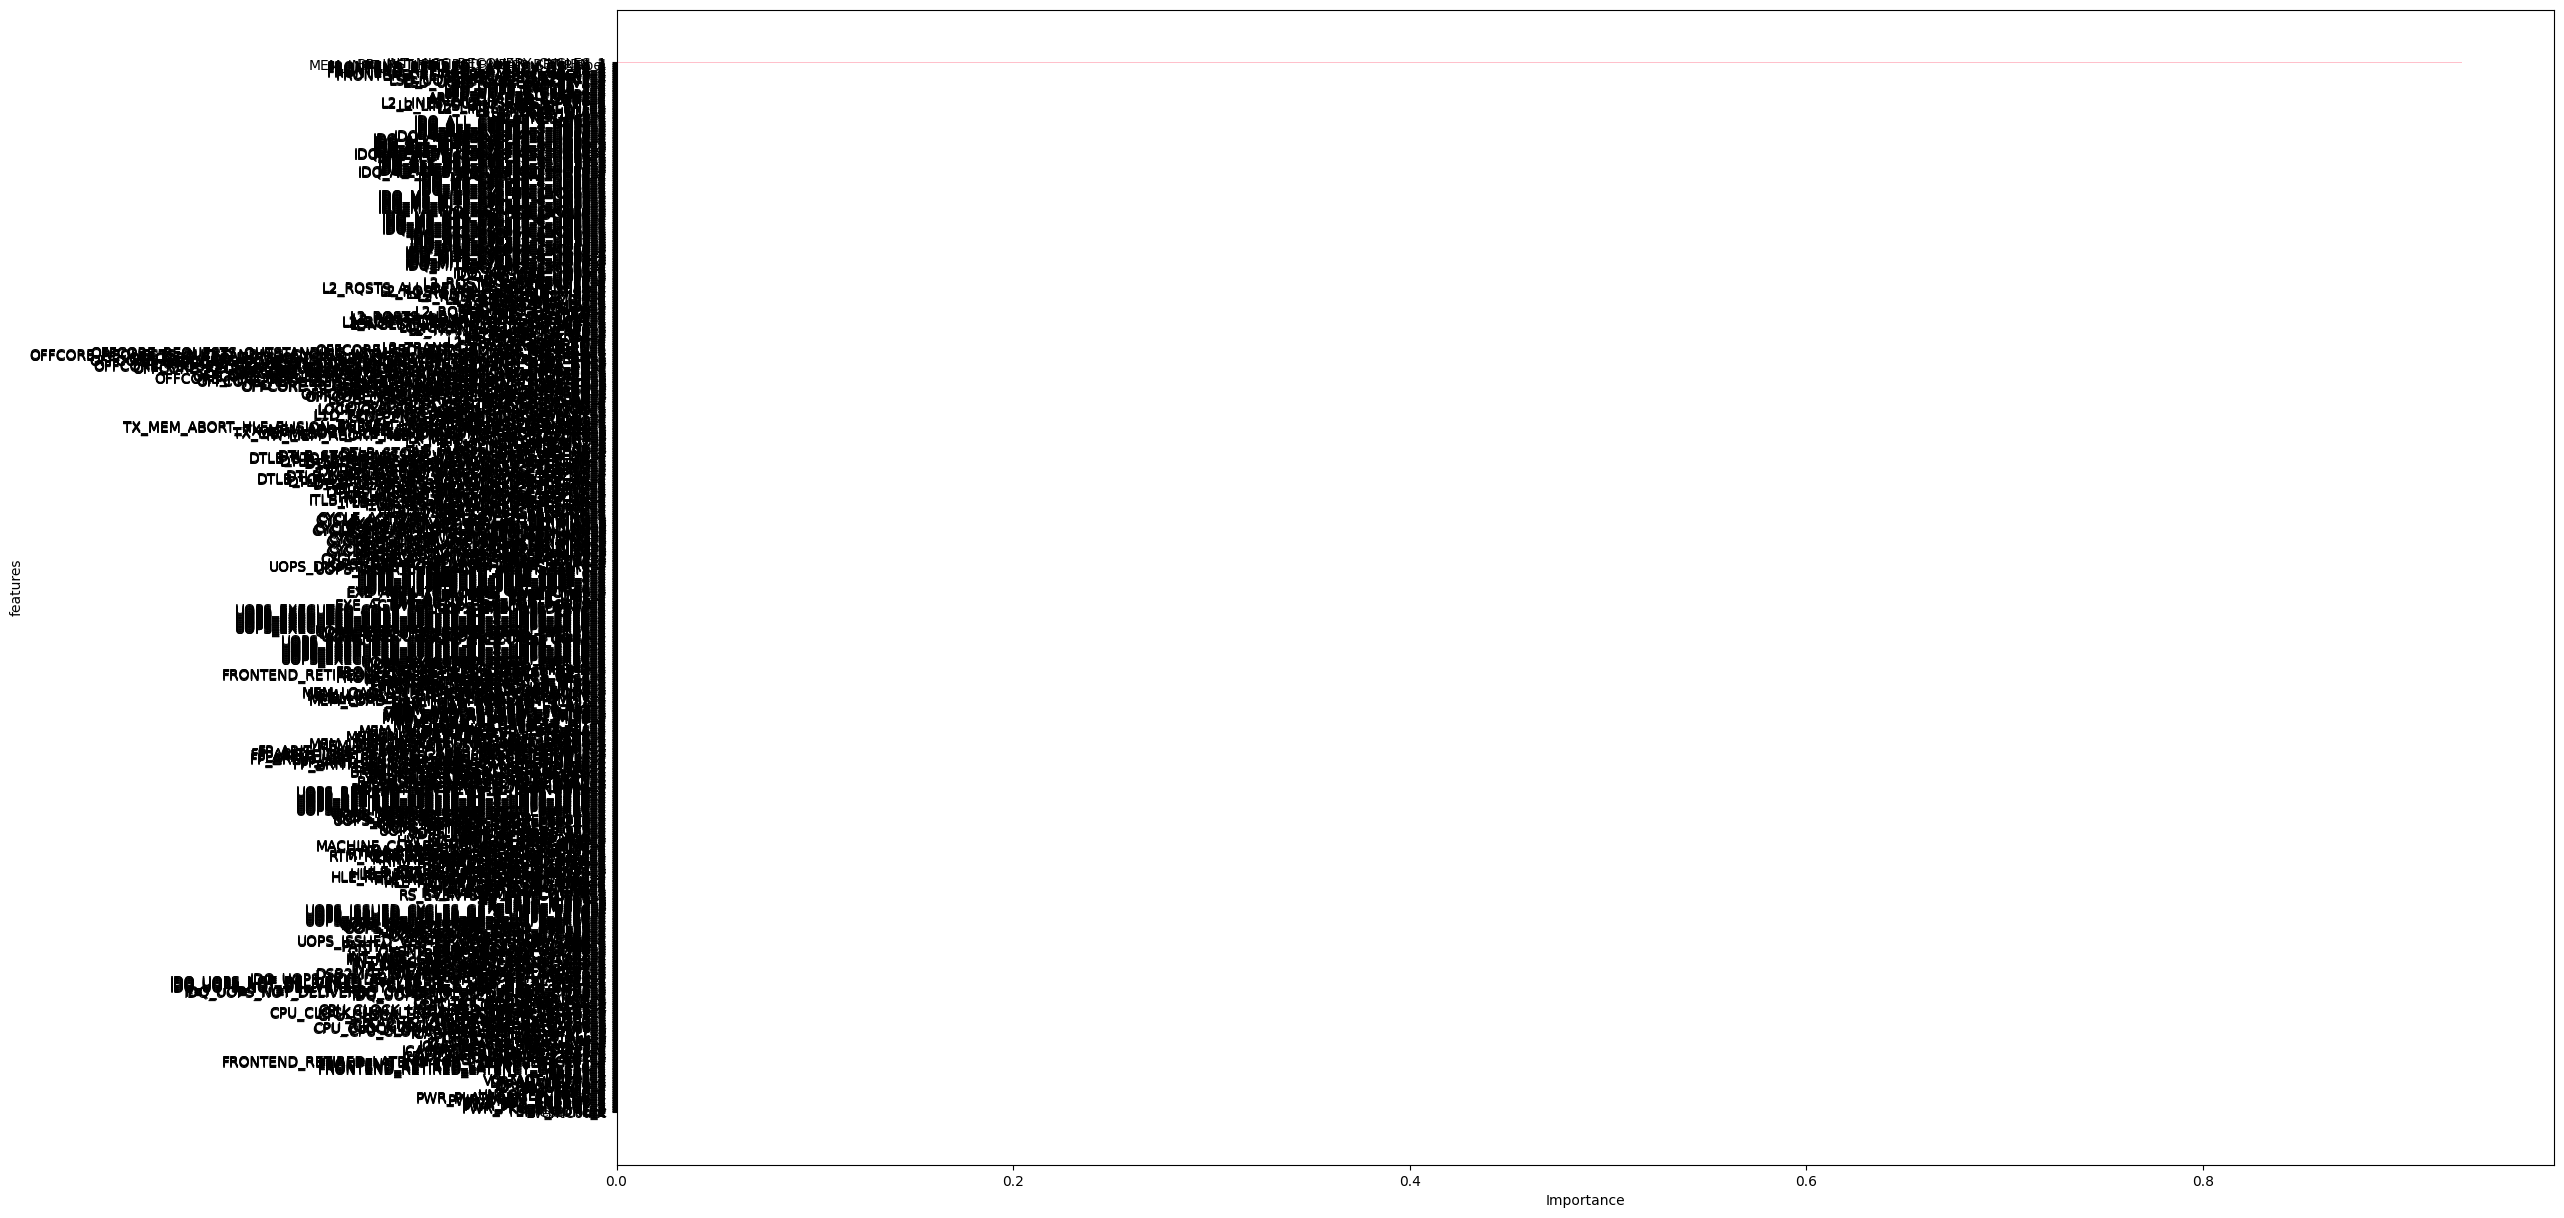

In [171]:
feature = []
imp = []
c = ['red', 'yellow', 'black', 'blue', 'orange', 'green', 'pink', 'purple']*5

for i,col in enumerate(df_all.drop('Unnamed: 0',axis=1)):
    feature.append(col)
    imp.append(clf.feature_importances_[i])

keydict = dict(zip(feature, imp))
feature.sort(key=keydict.get)
imp.sort()

fig = plt.figure(figsize = (25, 15))
plt.barh(feature, imp, color = c)
 
plt.ylabel("features")
plt.xlabel("Importance")
plt.show()

In [172]:
clf = RandomForestClassifier()

# Fit the model
clf.fit(x, y)
feature_importances = clf.feature_importances_


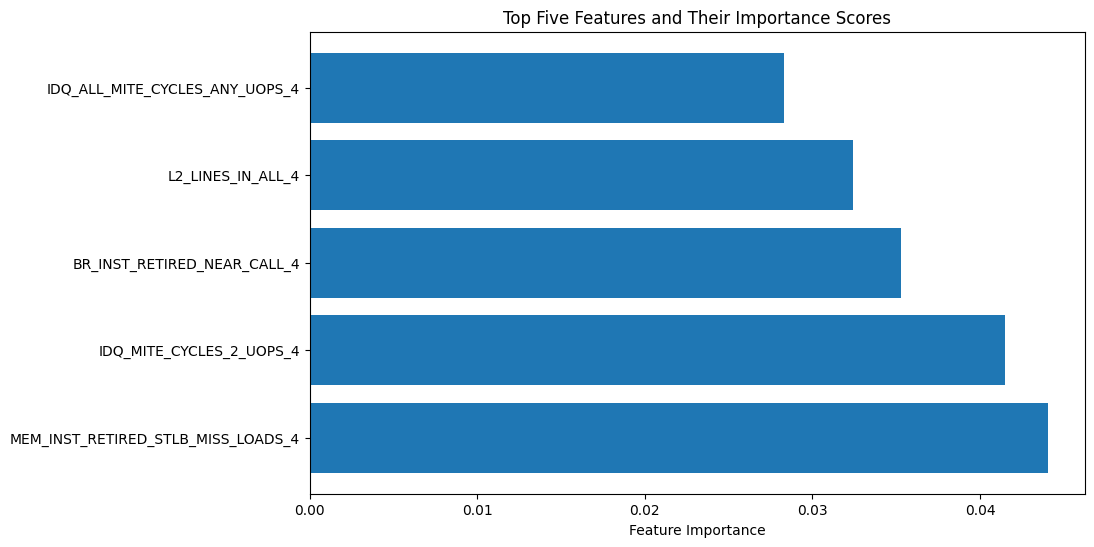

In [176]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Create a Random Forest Classifier instance
clf = RandomForestClassifier()

# Fit the model
clf.fit(x, y)

# Get feature importances
feature_importances = clf.feature_importances_
feature_names = list(df_all.columns)  # Replace with your feature names

# Combine feature names and importances
features_with_importance = list(zip(feature_names, feature_importances))

# Sort features by importance
features_with_importance.sort(key=lambda x: x[1], reverse=True)

# Select top five features
top_features = features_with_importance[:5]

# Extract top feature names and scores
top_feature_names = [feat[0] for feat in top_features]
top_feature_scores = [feat[1] for feat in top_features]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(top_feature_names)), top_feature_scores, align='center')
plt.yticks(np.arange(len(top_feature_names)), top_feature_names)
plt.xlabel('Feature Importance')
plt.title('Top Five Features and Their Importance Scores')
plt.show()


In [174]:
lp = list(df_all.columns)


In [175]:
lp

['Unnamed: 0',
 'EventCount',
 'CpuCount',
 'TEMP_CORE_1',
 'TEMP_CORE_2',
 'TEMP_CORE_3',
 'TEMP_CORE_4',
 'PWR_PKG_ENERGY_1',
 'PWR_PKG_ENERGY_2',
 'PWR_PKG_ENERGY_3',
 'PWR_PKG_ENERGY_4',
 'PWR_PP0_ENERGY_1',
 'PWR_PP0_ENERGY_2',
 'PWR_PP0_ENERGY_3',
 'PWR_PP0_ENERGY_4',
 'PWR_PP1_ENERGY_1',
 'PWR_PP1_ENERGY_2',
 'PWR_PP1_ENERGY_3',
 'PWR_PP1_ENERGY_4',
 'PWR_DRAM_ENERGY_1',
 'PWR_DRAM_ENERGY_2',
 'PWR_DRAM_ENERGY_3',
 'PWR_DRAM_ENERGY_4',
 'PWR_PLATFORM_ENERGY_1',
 'PWR_PLATFORM_ENERGY_2',
 'PWR_PLATFORM_ENERGY_3',
 'PWR_PLATFORM_ENERGY_4',
 'UNCORE_CLOCK_1',
 'UNCORE_CLOCK_2',
 'UNCORE_CLOCK_3',
 'UNCORE_CLOCK_4',
 'PP0_TEMP_1',
 'PP0_TEMP_2',
 'PP0_TEMP_3',
 'PP0_TEMP_4',
 'PP1_TEMP_1',
 'PP1_TEMP_2',
 'PP1_TEMP_3',
 'PP1_TEMP_4',
 'IO_REQUESTS_1',
 'IO_REQUESTS_2',
 'IO_REQUESTS_3',
 'IO_REQUESTS_4',
 'DRAM_READS_1',
 'DRAM_READS_2',
 'DRAM_READS_3',
 'DRAM_READS_4',
 'DRAM_WRITES_1',
 'DRAM_WRITES_2',
 'DRAM_WRITES_3',
 'DRAM_WRITES_4',
 'VOLTAGE_CORE_1',
 'VOLTAGE_CORE_2',
 'V